The stopping power of a material in J/m is $S(E)$. Thus we have 
\begin{equation}
\begin{split}
\frac{dE}{dx} = S(E)\\
E = \int S(E) dx
\end{split}
\end{equation}
How do I write $S(E)$ in terms of $x$? I would have to first find $E(x)$
\begin{equation}
\begin{split}
\frac{dE(x)}{dx} = S(E(x))\\
E(x) = \int S(E(x)) dx\\
\end{split}
\end{equation}
We define $E(x=0) = E_0$ which gives
\begin{equation}
\begin{split}
\frac{dE(x=0)}{dx} = S(E_0)\\
E(x=dx) = E_0 + S(E_0)\\
\frac{dE(x=dx)}{dx} = S(E(x=dx)) = S(E_0+S(E_0))\\
E(x=2dx) = E(x=dx) + S(E(x=dx)) = E_0 + S(E_0) + S(E_0+S(E_0))\\
\end{split}
\end{equation}





I now define $E(x=\alpha) = E_\alpha$. 
Now I will use induction to prove the following recursive formula for $E(x=ndx)$ where $n\in\mathbb{Z}, n>0$
\begin{equation}
\begin{split}
E_{ndx} = f_n\\
f_1 = E_0 + S(E_0)\\
f_n = f_{n-1} + S(f_{n-1}) 
\end{split}
\end{equation}
We have already shown that it holds for $n=1$ and $n=2$, so now we will show that if it holds for $n$, then it must also hold for $n+1$. Thus we have
\begin{equation}
\begin{split}
E_{ndx} = f_n\\
E_{(n+1)dx} = \frac{dE_{ndx}}{dx} + E_{ndx}\\
E_{(n+1)dx} = \frac{dE_{ndx}}{dx} + f_n\\
E_{(n+1)dx} = S(f_n) + f_n = f_{n+1}\\
\end{split}
\end{equation}



Now to write an implementation of the Bethe Bloch formula

In [26]:
using Unitful #https://painterqubits.github.io/Unitful.jl/stable/
#quantity * @u_str("unit abbreviation") 
using Symbolics #https://symbolics.juliasymbolics.org/dev/
#cite https://doi.org/10.48550/arXiv.2105.03949
using Latexify
using Test
#1 * @u_str("mA") is 1 milliamp
using PlotlyJS, CSV, DataFrames
using Printf
using SymPy
using PDFIO
using Unzip
parent_dir = "C:\\Users\\engin\\Documents\\GitHub\\Energy\\"

"C:\\Users\\engin\\Documents\\GitHub\\Energy\\"

z is the charge of the incoming particle and Z is the atomic number of the product. 

In [ ]:
β, v, c, m_e, π, n, z, e, ε_0, I = symbols("β v c m_e π n z z e ε_0 I") 
N_A, Z, A, M_u, ρ = symbols("N_A Z A M_u ρ")
N_A = 6.02214076e23 #avogadro's constant
m_e = 9.10938291e-31 #electron mass in kg
π = pi
ε_0 = 8.85418781e-12 #permittivity of free space in F/m
I = Z * uconvert(u"J", 10u"eV") / u"J"
M_u = 0.99999999965 / 1000
c = 299792458 #m/s
n = N_A * Z * ρ / (A* M_u)
β = v/c
e = 1.6021766208e-19 #elementary charge in C
#for our purpose Z is also the molar mass  in grams
S = -((4π*n*(z^2)/ (m_e * c^2 * β^2)) * ((e^2 / (4*π*ε_0))^2) 
    * (log((2m_e * c^2 * β^2)/(I*(1-β^2)))-β^2)) 

                         /           2             /                       2 \
                     2   |          v              | 1.13712592191006e-12*v  |
-442.177033512737*Z*z *ρ*|- ----------------- + log|-------------------------|
                         |  89875517873681764      |  /             2       \|
                         |                         |  |            v        ||
                         |                         |Z*|1 - -----------------||
                         \                         \  \    89875517873681764//
------------------------------------------------------------------------------
                                         2                                    
                                      A*v                                     

\ 
| 
| 
| 
| 
| 
/ 
--
  
  

In [ ]:
#speed of light 
S_estimate = S.subs(Z, 100).subs(z, 1).subs(ρ, 1000).subs(A, 200)

                  /           2             /                      2\\ 
                  |          v              |1.13712592191006e-14*v || 
-221088.516756368*|- ----------------- + log|-----------------------|| 
                  |  89875517873681764      |              2        || 
                  |                         |             v         || 
                  |                         | 1 - ----------------- || 
                  \                         \     89875517873681764 // 
-----------------------------------------------------------------------
                                    2                                  
                                   v                                   

In [ ]:
S_estimate_num = convert(Function, S_estimate)
v_range = LinRange(.1, c/10, 10^4)#Int(floor(c/10)))
s_range = [S_estimate_num(BigFloat(v_val)) for v_val in v_range]

10000-element Vector{BigFloat}:
  8.116791217197184929834770806188313532196945155057981494777849343657484009228625e+08
  0.3958483065442775513024791348828596346462125101142691281264411371179561496738559
  0.09044206401405074282162918638994236574958168817772882613388458936465722193704339
  0.03798095281310676532890715422812560708562472160360212033536530185639441463755775
  0.02048000357831871109846314364409950404543983893674857665107969261099342553346965
  0.01266820689796414506118944677127011063697997421070198615258006255401695118960645
  0.008548272710997542007941791310811079664743977857894481772152278983639455201095537
  0.006125630637664840770392725383865224201940852604913862358341367985088086046333457
  0.004587313568059822237119791379916008800799932647122401584754476235189866374549018
  0.003553021943000846673290264874878218408682598540094686015412385822077014211149817
  ⋮
 -5.723091117510280133419566298608151345620645489592267970215553734905290908003489e-10
 -5.722438786852122823

In [ ]:
S_num = convert(Function, S)
S_num(A, Z, v, z, ρ) == S #v and z are the for the projectile.
#all other arguments are determined by the target

true

In [ ]:
kinetic_energy(m,v) = uconvert(u"keV", .5*m * v^2 * u"J")
velocity(m,E) = uconvert(u"m/s", sqrt(2*E/m))

velocity (generic function with 1 method)

In [ ]:
log10.([velocity(1/N_A*u"g", 1*u"keV") / u"m/s",
velocity(1/N_A*u"g", 10^4*u"keV") / u"m/s"])

2-element Vector{Float64}:
 5.642745645892041
 7.642745645892041

In [ ]:
ρ = 8.91 * 10^3 
A = 28
Z = 58
z = 1
specific_s = convert(Function, S_num(28, 58, v, 1, 8.91 * 10^3))

#118 (generic function with 1 method)

In [ ]:
v_range = LinRange(10^5, 10^7.5, 10^4)#Int(floor(c/10)))
e_range = [kinetic_energy(10^-3 / N_A, v_val) / u"keV"
            for v_val in v_range];
s_range = [specific_s(BigFloat(v_val)) for v_val in v_range];

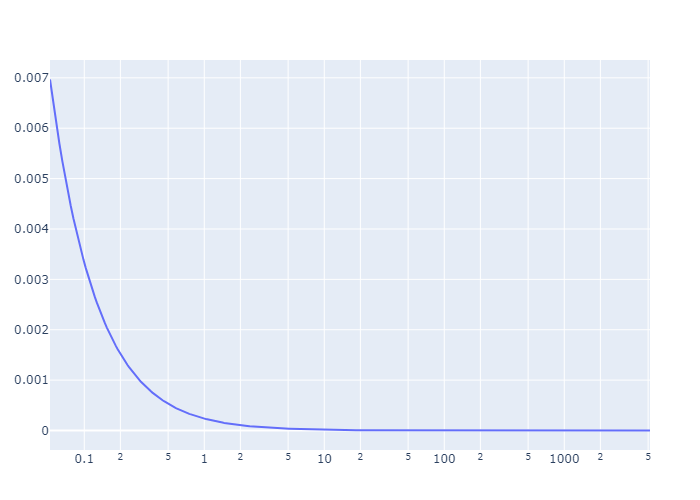

In [ ]:
plot(e_range, s_range, 
Layout(xaxis_type = "log"))

In [ ]:
plot(S_estimate_num, .1, Int(floor(c/10)),
Layout(yaxis_type="log", xaxis_type = "log")
)

There is already existing, fast, and free software that has more corrections than I could hope to include. 

https://www-nds.iaea.org/stopping/stopping_prog.html

http://www.casp-program.org/ 

https://www.sdu.dk/en/dpass 

I need to learn how to automate the use of this software to add to my simulations. 

Exported all of the simulation results from DPASS. 

Remember in the data I exported from DPASS, the energies are in MeV/dalton and the stopping powers are in eV/nm. 

In [30]:
function read_dpass_row(row)
    strs = split(row[1:end-1], " ", keepempty = false)
    return [parse(Float64, str) for str in strs]
end
function read_dpass(file, dir)
    file_path = dir * file
    file_as_array = split(open(f->read(f, String), file_path), "\n")
    data_rows = 16:length(file_as_array)-1
    file_as_array = file_as_array[data_rows]
    nested_vector = [read_dpass_row(line) for line in file_as_array]
    energies = [vector[1] for vector in nested_vector]
    stopping_powers = [vector[2] for vector in nested_vector]
    return energies, stopping_powers
end

dpass_dir = "ImportedData\\DPASS_Output\\"
dir = parent_dir * dpass_dir
file = "1_2_spline_output.txt"
read_dpass(file, dir)

([0.001, 0.001013925, 0.001028045, 0.001042361, 0.001056876, 0.001071593, 0.001086516, 0.001101646, 0.001116987, 0.001132541  …  882.97, 895.2657, 907.7327, 920.3732, 933.1898, 946.1848, 959.3608, 972.7203, 986.2658, 1000.0], [0.005261021, 0.005292574, 0.005324538, 0.005356889, 0.005389599, 0.00542264, 0.005455978, 0.005489578, 0.005523403, 0.00555741  …  3.87006e-5, 3.857332e-5, 3.844862e-5, 3.832613e-5, 3.820543e-5, 3.808607e-5, 3.796755e-5, 3.784931e-5, 3.773076e-5, 3.761126e-5])